In [1]:
# !pip install lightgbm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rizqi01/ps4e9-original-data-loan-approval-prediction")

# print("Path to dataset files:", path)

In [4]:
data = pd.read_csv('updated_credit_risk_dataset.csv')
data.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_term,credit_score,monthly_expenses,co_applicant_income,employment_type,existing_loans,debt_to_income_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,48,668,25618,0,Self-Employed,2,0.76
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,60,677,6377,0,Self-Employed,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,36,652,6045,6339,Unemployed,5,3.18


In [5]:
data.count()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
loan_term                     32581
credit_score                  32581
monthly_expenses              32581
co_applicant_income           32581
employment_type               32581
existing_loans                32581
debt_to_income_ratio          32581
dtype: int64

In [6]:
data.shape

(32581, 19)

In [7]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_term',
       'credit_score', 'monthly_expenses', 'co_applicant_income',
       'employment_type', 'existing_loans', 'debt_to_income_ratio'],
      dtype='object')

In [8]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_term                       int64
credit_score                    int64
monthly_expenses                int64
co_applicant_income             int64
employment_type                object
existing_loans                  int64
debt_to_income_ratio          float64
dtype: object

In [9]:
data_sub = pd.read_csv('sample_submission.csv')
data_sub.head(5)

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [10]:
data_sub['loan_status'].value_counts()

loan_status
0.5    39098
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
 12  loan_term                   32581 non-null  int64  
 13  credit_score                325

In [12]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_term,credit_score,monthly_expenses,co_applicant_income,existing_loans,debt_to_income_ratio
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211,36.158743,679.376999,3.296691e+04,9914.945520,2.491207,0.434076
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001,17.029230,49.894846,3.004163e+04,21996.417725,1.706672,0.312146
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,12.000000,456.000000,1.290000e+03,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,24.000000,645.000000,1.806700e+04,0.000000,1.000000,0.220000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,36.000000,680.000000,2.704100e+04,0.000000,2.000000,0.360000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000,48.000000,713.000000,4.008800e+04,13738.000000,4.000000,0.570000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,60.000000,850.000000,2.045404e+06,622641.000000,5.000000,5.420000


### max of the age

In [13]:
data['person_age'].max()

144

### add data_sub column of loan_status to main data

In [14]:
data_sub.columns

Index(['id', 'loan_status'], dtype='object')

In [15]:
data_sub = data_sub.drop(columns='id')

In [16]:
data_sub.head(3)

,loan_status
0,0.5
1,0.5
2,0.5


In [17]:
data['loan_status'] = data_sub

In [18]:
data.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_term,credit_score,monthly_expenses,co_applicant_income,employment_type,existing_loans,debt_to_income_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.5,0.59,Y,3,48,668,25618,0,Self-Employed,2,0.76
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.5,0.10,N,2,60,677,6377,0,Self-Employed,0,0.10


In [19]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_term                        0
credit_score                     0
monthly_expenses                 0
co_applicant_income              0
employment_type                  0
existing_loans                   0
debt_to_income_ratio             0
dtype: int64

In [20]:
data['person_emp_length'].fillna(data['person_emp_length'].mean(),inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(),inplace=True)


C:\Users\Adams\AppData\Local\Temp\ipykernel_3672\1714781175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].mean(),inplace=True)
C:\Users\Adams\AppData\Local\Temp\ipykernel_3672\1714781175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [21]:
data.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_term,credit_score,monthly_expenses,co_applicant_income,employment_type,existing_loans,debt_to_income_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.5,0.59,Y,3,48,668,25618,0,Self-Employed,2,0.76
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.5,0.10,N,2,60,677,6377,0,Self-Employed,0,0.10


In [22]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_term                     0
credit_score                  0
monthly_expenses              0
co_applicant_income           0
employment_type               0
existing_loans                0
debt_to_income_ratio          0
dtype: int64

# EDA(Exploratary Data Analysis)

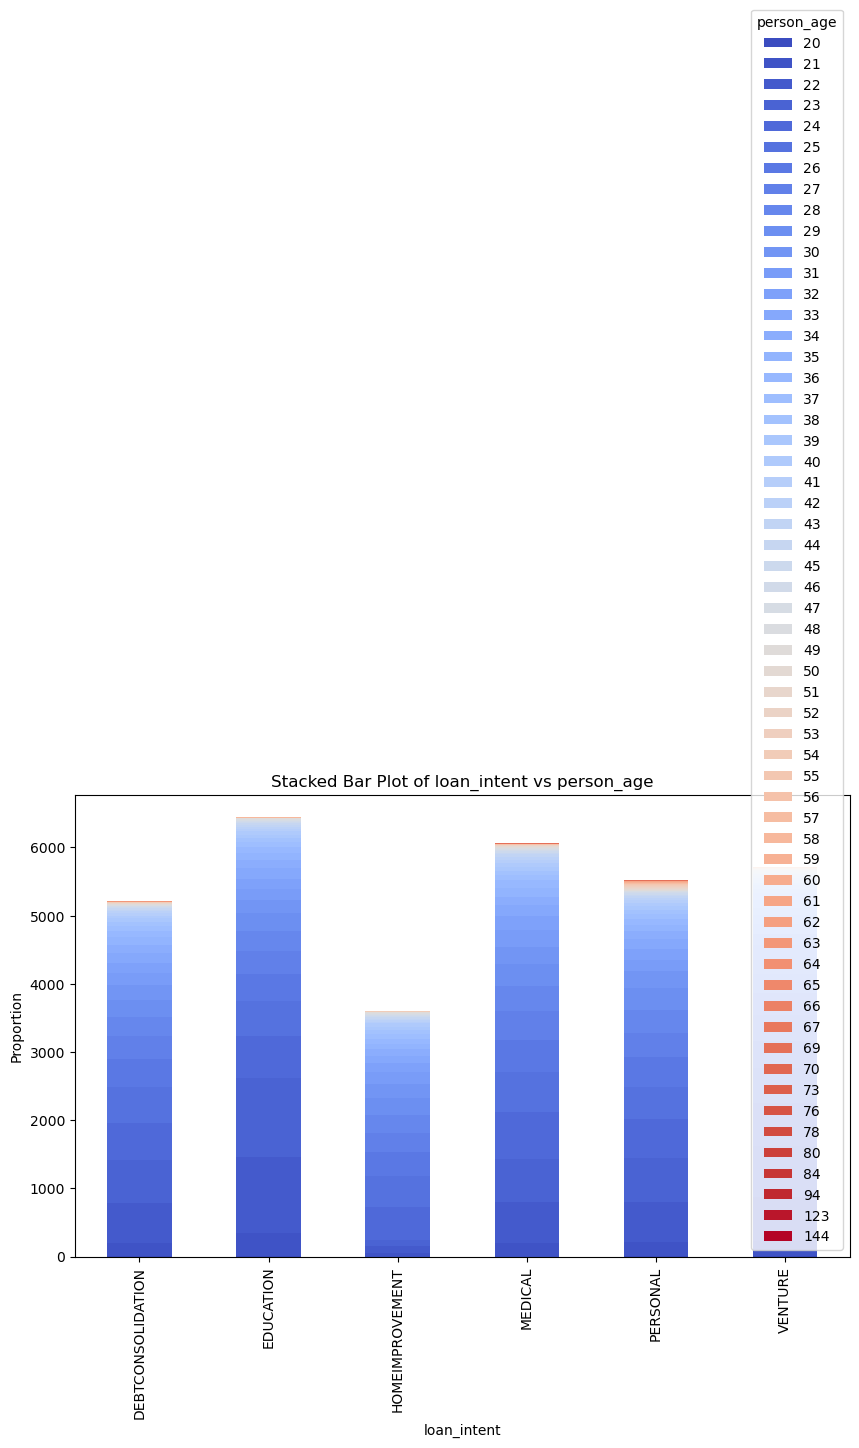

In [23]:
def stacked_bar_plot(df, feature, target='person_age'):
    crosstab = pd.crosstab(df[feature], df[target])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(data, 'loan_intent')

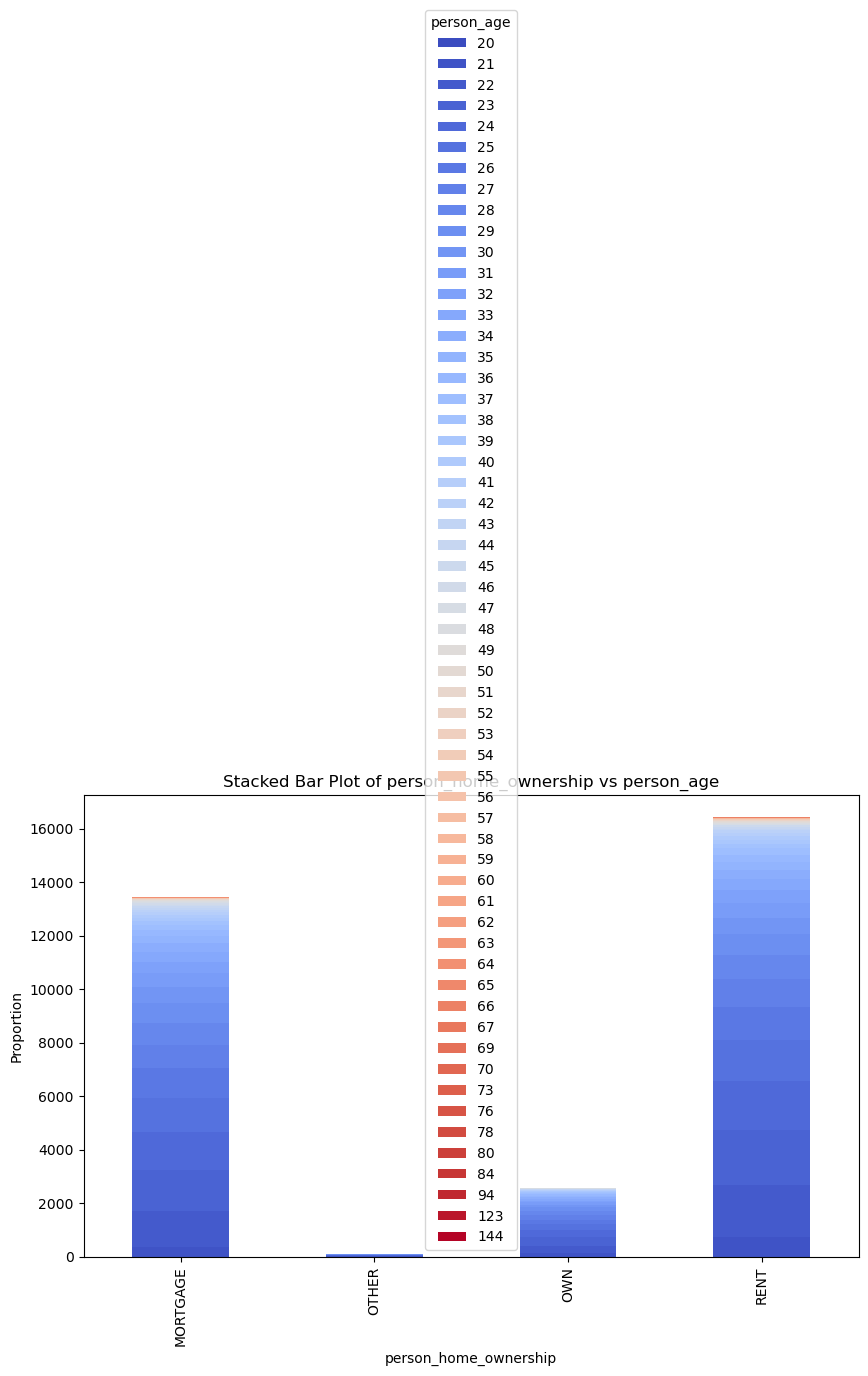

In [24]:
stacked_bar_plot(data, 'person_home_ownership')

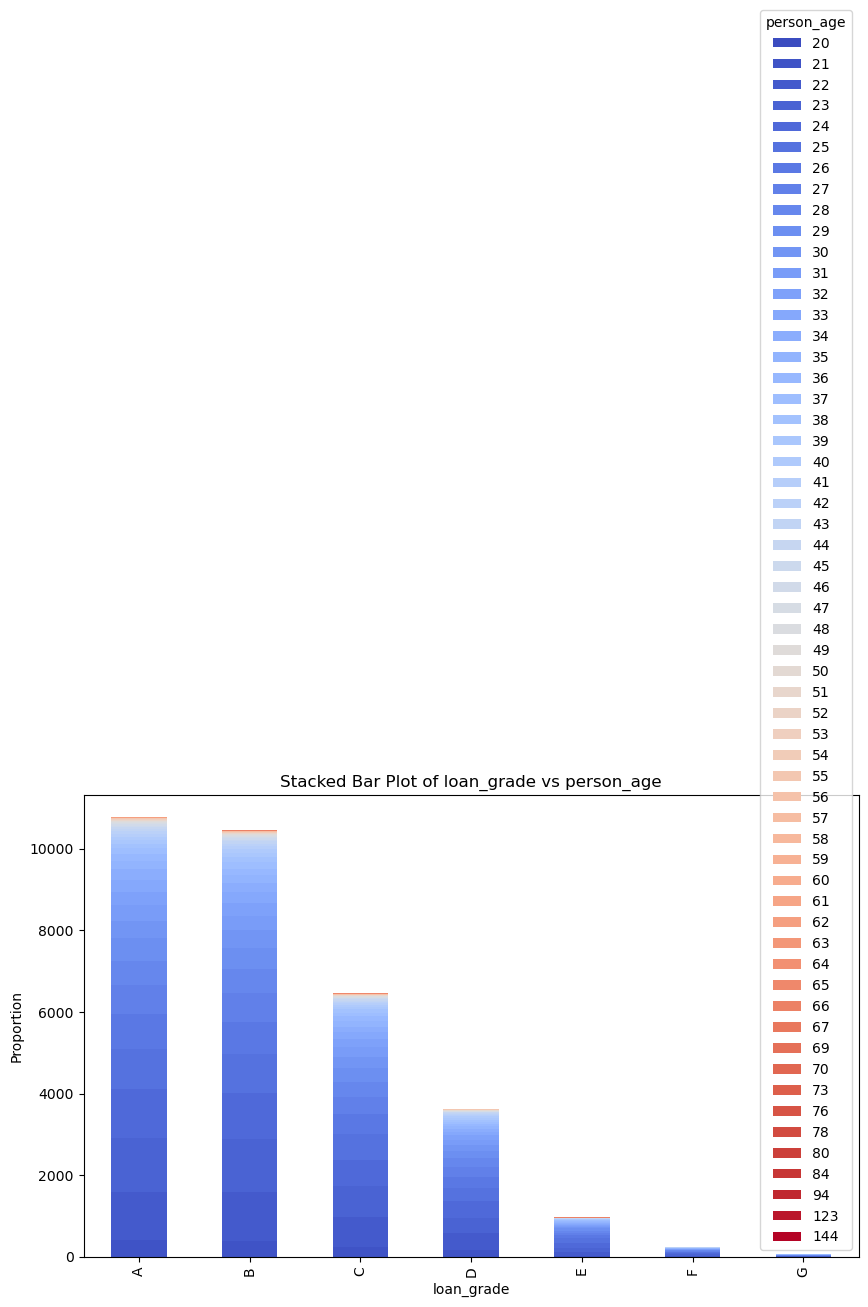

In [25]:
stacked_bar_plot(data, 'loan_grade')

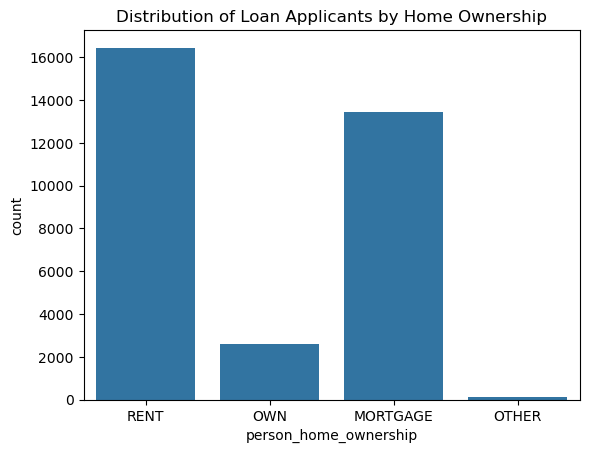

In [26]:
sns.countplot(data=data, x='person_home_ownership')
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()

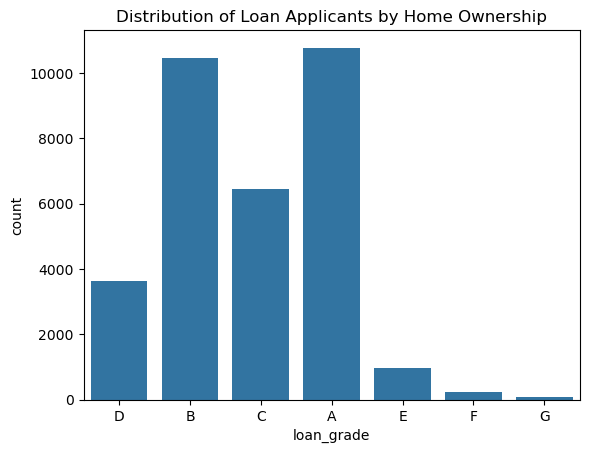

In [27]:
sns.countplot(data=data, x='loan_grade')
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()

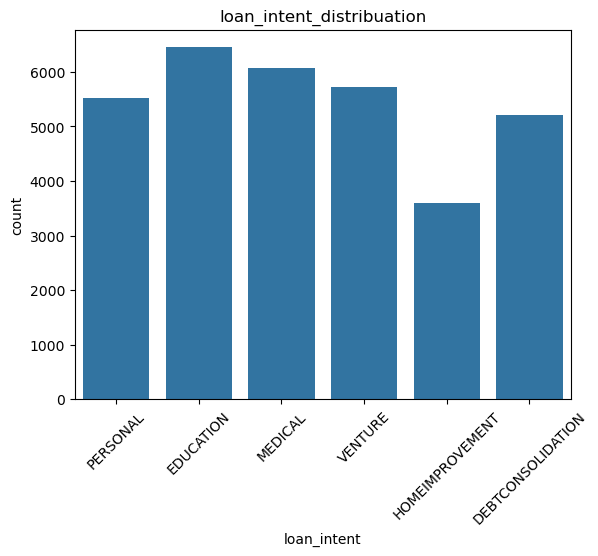

In [28]:
sns.countplot(data=data,x='loan_intent')
plt.title('loan_intent_distribuation')
plt.xticks(rotation=45)
plt.show()

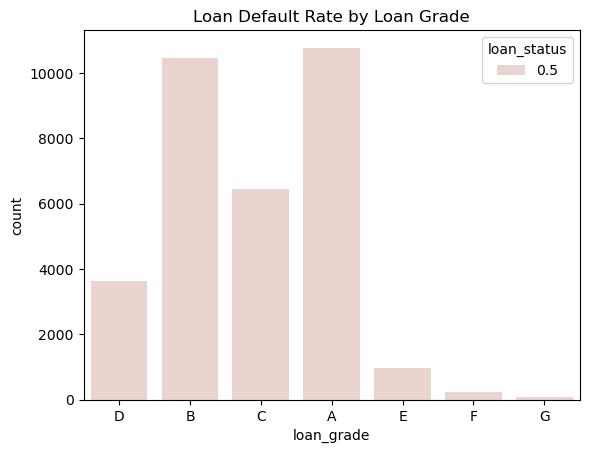

In [29]:
sns.countplot(data=data, x='loan_grade', hue='loan_status')
plt.title('Loan Default Rate by Loan Grade')
plt.show()

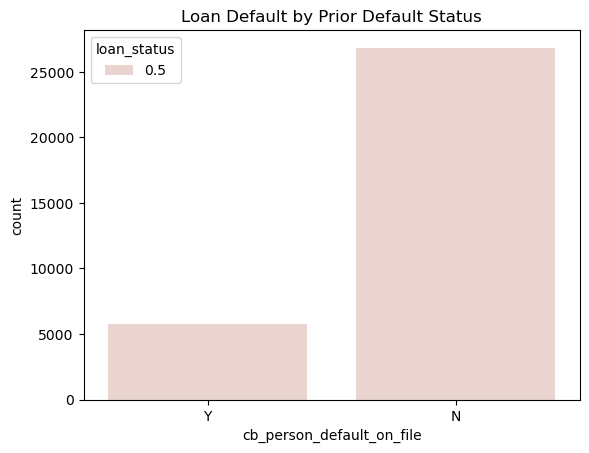

In [30]:
sns.countplot(data=data, x='cb_person_default_on_file', hue='loan_status')
plt.title('Loan Default by Prior Default Status')
plt.show()

In [31]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_term',
       'credit_score', 'monthly_expenses', 'co_applicant_income',
       'employment_type', 'existing_loans', 'debt_to_income_ratio'],
      dtype='object')

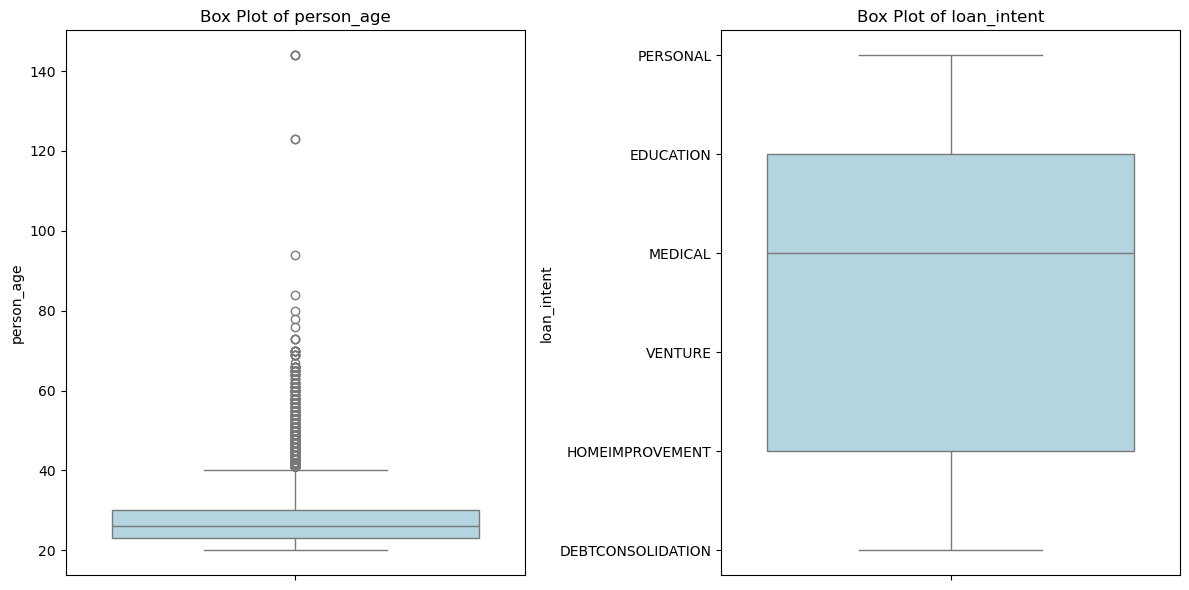

In [32]:
def box_plot(df,columns):
    plt.figure(figsize=(12,6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

box_plot(data, ['person_age', 'loan_intent'])


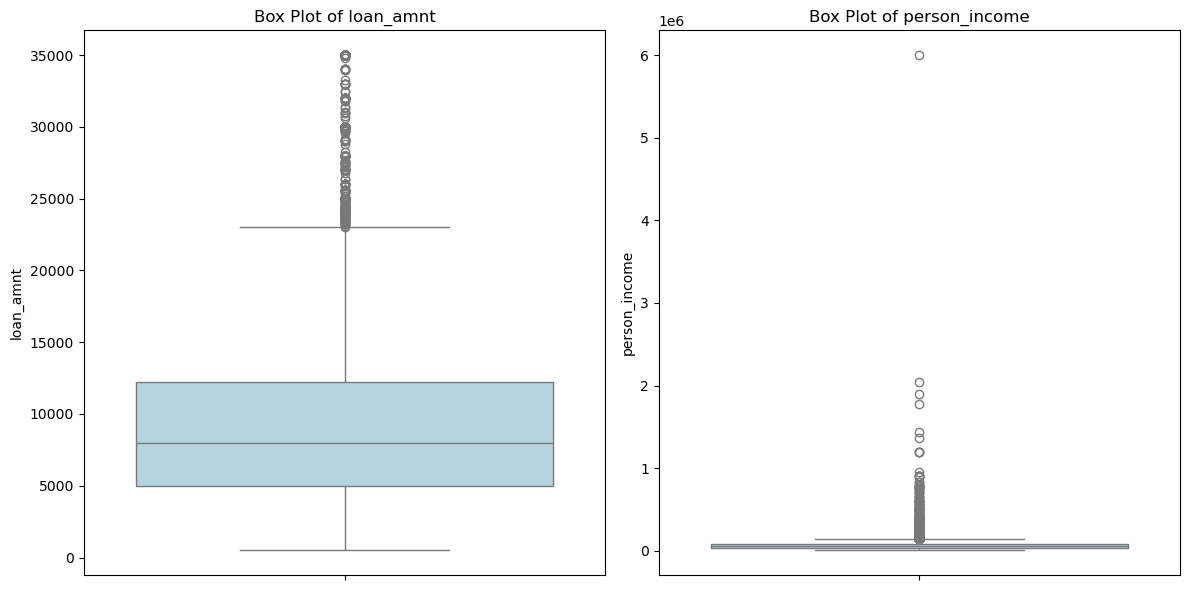

In [33]:
def box_plot(df,columns):
    plt.figure(figsize=(12,6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

box_plot(data, ['loan_amnt', 'person_income'])


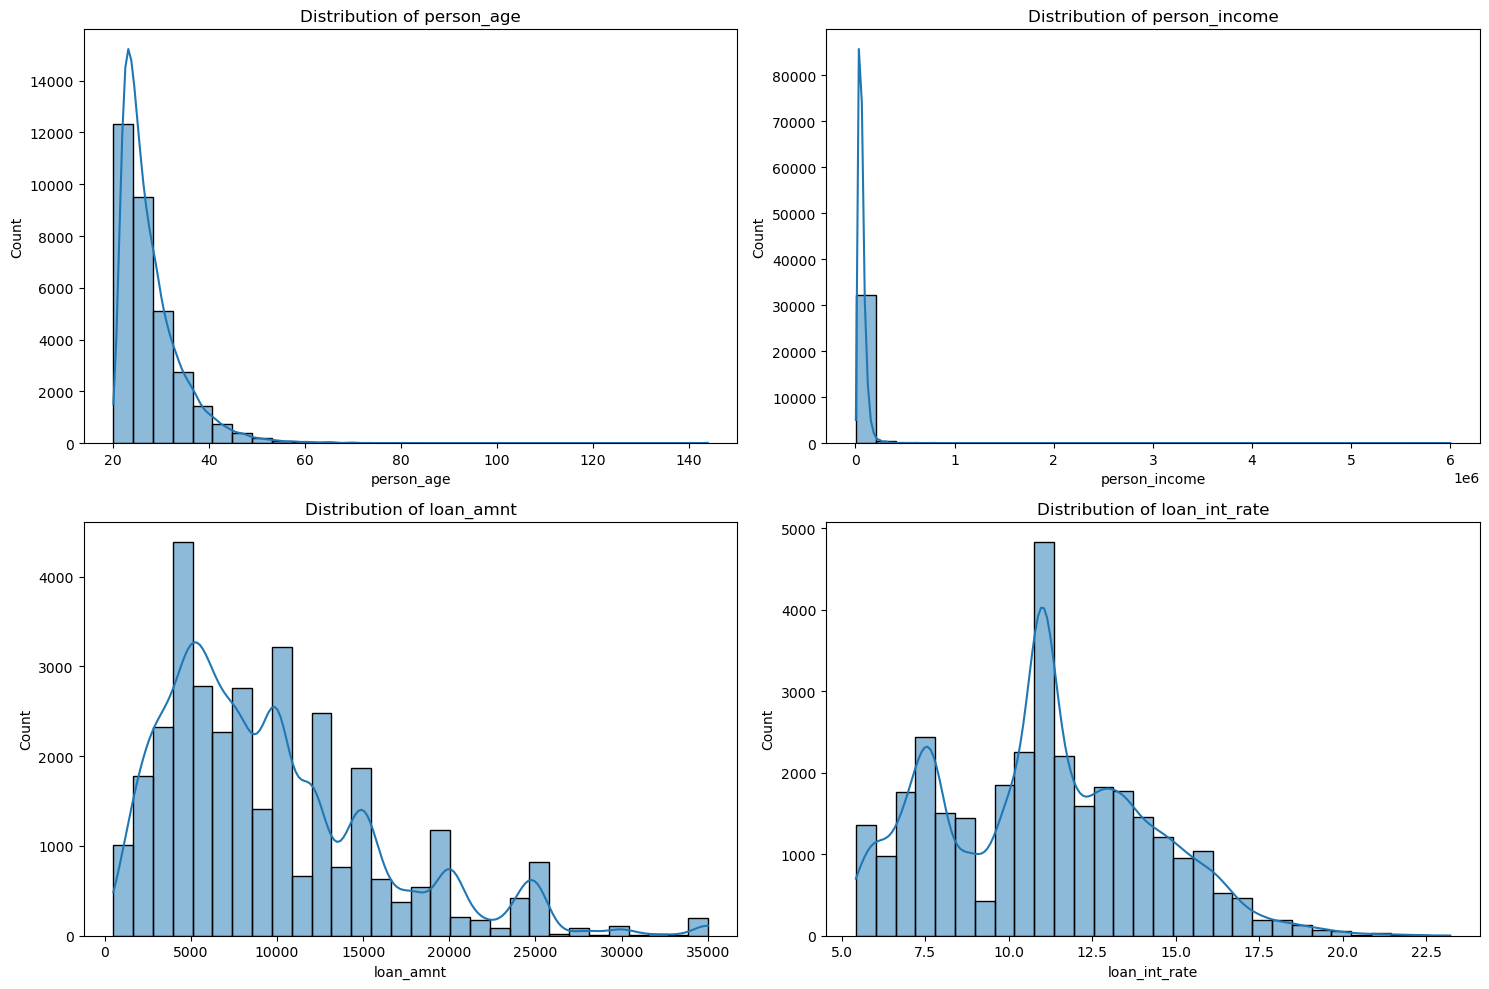

In [34]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

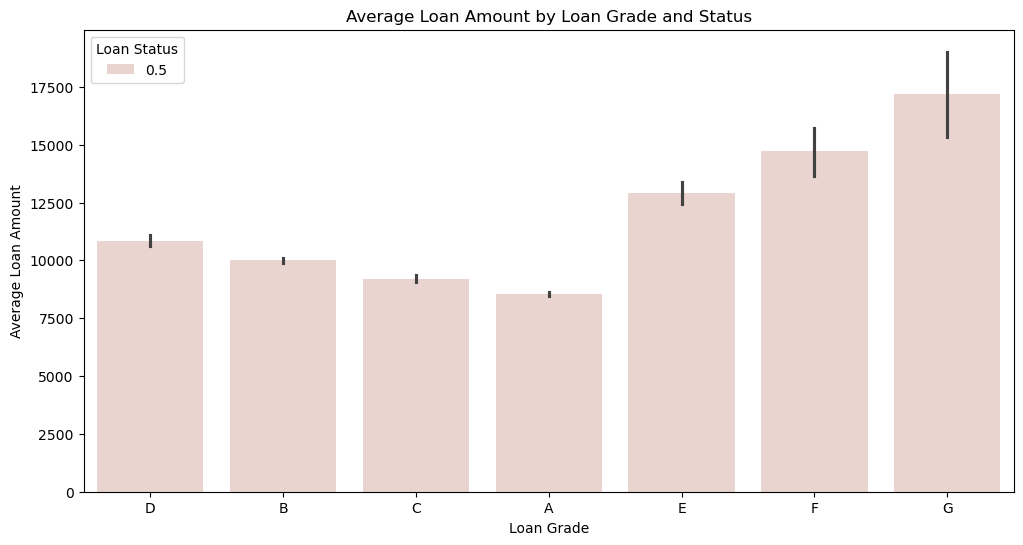

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

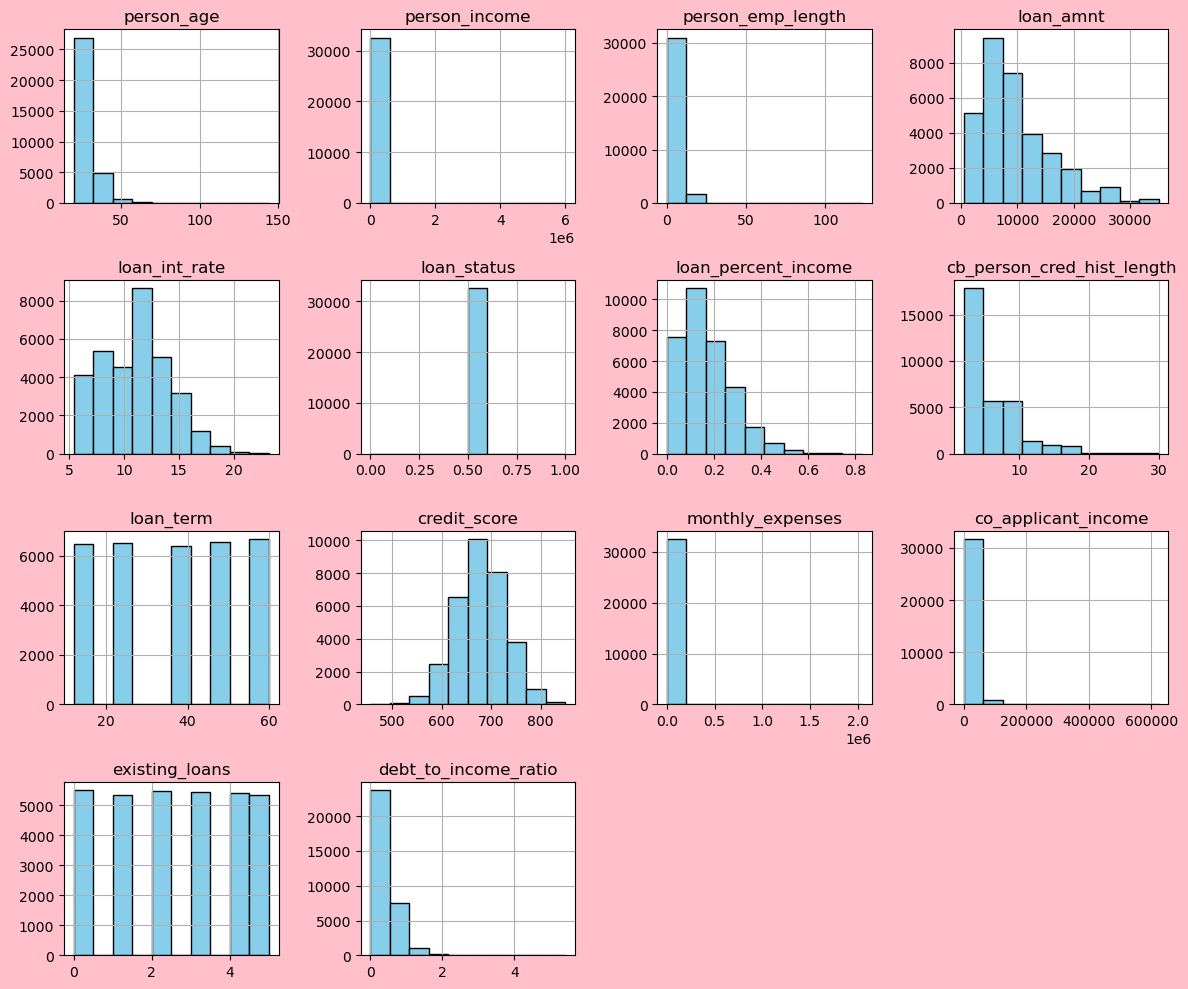

In [36]:
data.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('pink')
plt.tight_layout()
plt.show()

In [ ]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(data[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

In [ ]:
data.columns


In [ ]:
data.head(2)

In [ ]:
num_features = ['person_age', 'person_income', 'employment_type', 'co_applicant_income']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
data.info()

In [ ]:
data['person_home_ownership'].value_counts()

In [ ]:
data['person_home_ownership'].replace({'RENT':'1','MORTGAGE':'2','OWN':'3','OTHER':'4'},inplace=True)

In [ ]:
data['loan_intent'].value_counts()

In [ ]:
data['loan_intent'].replace({'EDUCATION':'1','MEDICAL':'2','VENTURE':'3','PERSONAL':'4','DEBTCONSOLIDATION':'5','HOMEIMPROVEMENT':'6'},inplace=True)

In [ ]:
data['loan_grade'].value_counts()

In [ ]:
data['loan_grade'].replace({'A':'1','B':'2','C':'3','D':'4','E':'5','F':'6','G':'7'},inplace=True)

In [ ]:
data['cb_person_default_on_file'].value_counts()

In [ ]:
data['cb_person_default_on_file'].replace({'N':'0','Y':'1'},inplace=True)

In [ ]:
data['employment_type'].value_counts()

In [ ]:
data['employment_type'].replace({'Freelancer':'1','Salaried':'2','Self-Employed':'3','Unemployed':'4'},inplace=True)

In [ ]:
data.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'employment_type','cb_person_default_on_file']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


In [ ]:
data.dtypes

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#C770E7')  
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def feature_engineering(df):
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']  
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate'] 
    df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'])
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'] 
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']  
    df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'])
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'])      
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'] 
    
    return df


In [ ]:
feature_engineering(data)

In [ ]:
data.columns

# remove the unneccesrary columns in the dataset...  

In [ ]:
data.to_csv('dataorg.csv', index=False)

In [ ]:
data1 = pd.read_csv('dataorg.csv')

In [ ]:
data.columns

In [ ]:
selected_features = [
    'person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
    'loan_intent', 'loan_grade', 'loan_amnt','loan_status', 'loan_int_rate', 'loan_percent_income',
    'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_term',
    'credit_score', 'existing_loans', 'debt_to_income_ratio'
]


data_selected = data1[selected_features]



In [ ]:
data_selected.to_csv('dataorgclean.csv', index=False)

print(f"✅ Cleaned dataset saved as {'dataorgclean'}")

# main dataset now... game begin 

In [ ]:
dataOrg = pd.read_csv('dataorgclean.csv')

In [ ]:
dataOrg.head(3)


In [ ]:
x = dataOrg.drop('loan_status',axis=1)
y = dataOrg['loan_status']

In [ ]:
x,y

In [ ]:
print(dataOrg['loan_status'].dtype)


In [ ]:
x.shape,y.shape

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:


model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
model.fit(x_train, y_train)


In [ ]:
# Make predictions
y_pred = model.predict(x_test)

# Show some predictions
print(y_pred[:10])  # First 10 predictions


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📌 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📌 R² Score: {r2:.4f}")  


In [ ]:
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]
print(y_pred_class[:10])  # First 10 rounded predictions


In [ ]:
dataOrg.head(3)

In [ ]:
import joblib

# Save the trained model
model_filename = "lgbm_loan_model.pkl"
joblib.dump(model, model_filename)

print(f"✅ Model saved as {model_filename}")


In [ ]:
# Load the saved model
model_loaded = joblib.load("lgbm_loan_model.pkl")

# Use the loaded model to make predictions
y_pred = model_loaded.predict(x_test)
print("✅ Model loaded and used for prediction.")
